### Import necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay

### loading the dataset 

In [7]:
disease = pd.read_csv("strokedata.csv")
disease.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [8]:
disease.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
disease.shape

(5110, 12)

In [10]:
disease.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [11]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### DATA CLEANING

In [12]:
disease.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Impute null values

In [14]:
disease.bmi.mean()

28.893236911794666

In [15]:
disease.bmi.fillna(disease.bmi.mean(), inplace = True)

In [16]:
disease.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [17]:
values = disease[['hypertension','heart_disease','ever_married','gender','work_type','Residence_type','smoking_status','stroke']]

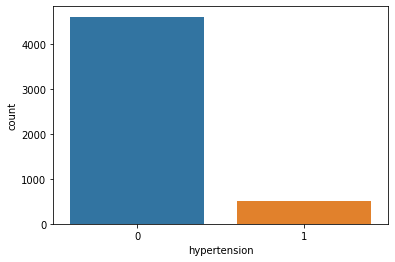

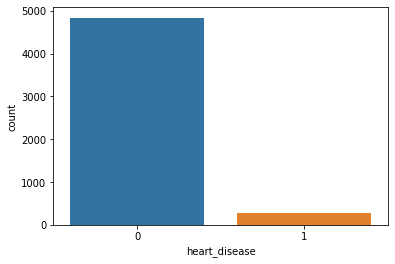

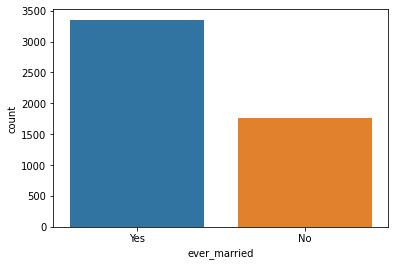

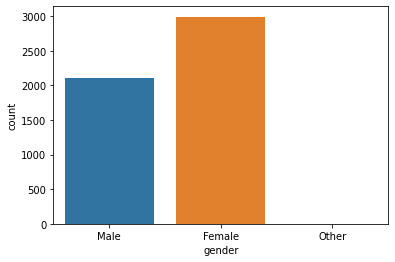

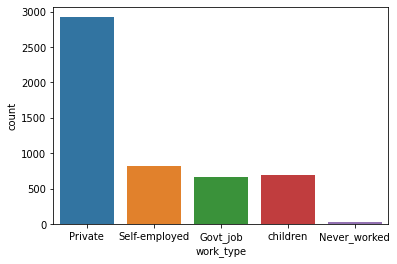

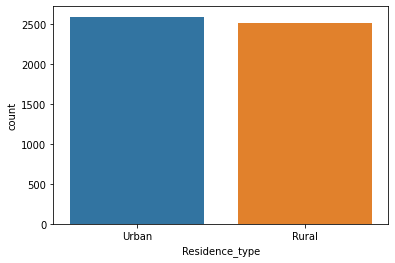

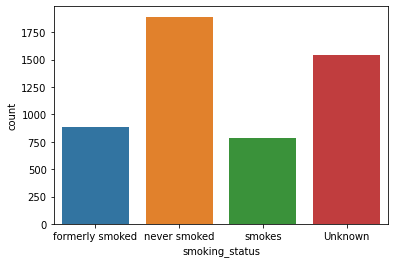

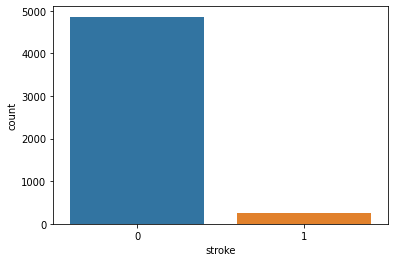

In [74]:
for i in values:
    sns.countplot(x = i, data = values)
    plt.show()

In [19]:
sns.countplot

<function seaborn.categorical.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

<AxesSubplot:xlabel='age', ylabel='bmi'>

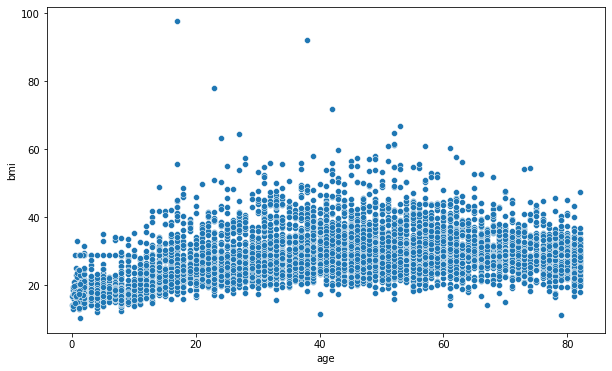

In [79]:
plt.figure(figsize=(10 ,6))
sns.scatterplot(data = disease , x = 'age' , y ='bmi')

<AxesSubplot:xlabel='stroke', ylabel='age'>

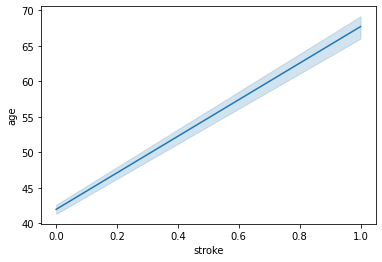

In [20]:
sns.lineplot(x = 'stroke', y = 'age', data = disease)

<AxesSubplot:xlabel='age', ylabel='Count'>

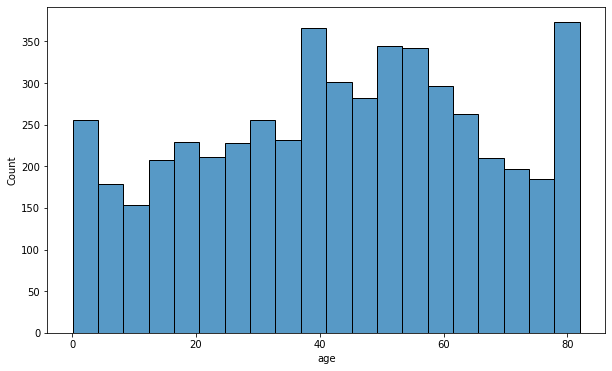

In [83]:
plt.figure(figsize=(10 ,6))
sns.histplot(data = disease , x = disease['age'])

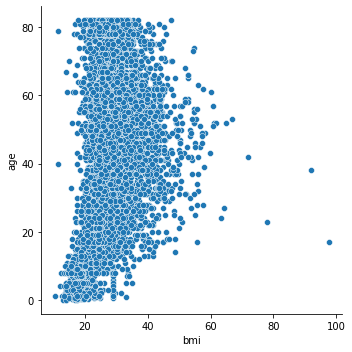

In [21]:
sns.relplot(x = 'bmi', y = 'age', data = disease)

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

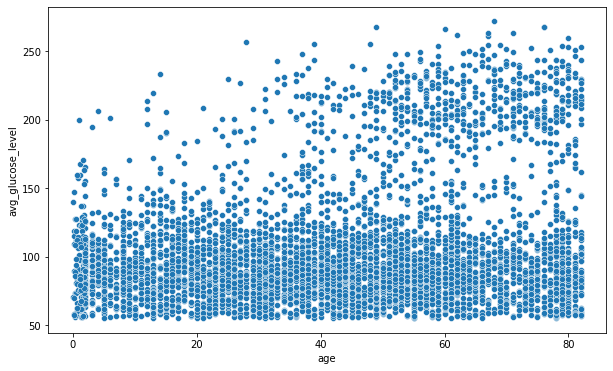

In [22]:
plt.figure(figsize=(10 ,6))
sns.scatterplot(data = disease , x = 'age' , y ='avg_glucose_level')

# Logistic Regression

### Logistic regression model is one of the efficient and pervasive classification methods for the data science. Is actually a classification technique that gives the probabilistic output of dependent categorical value based on certain independent variables.

In [24]:
x = disease[['age', 'hypertension', 'heart_disease','bmi', 'avg_glucose_level']]
y = disease['stroke']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [57]:
clf = LogisticRegression(random_state=0)

In [59]:
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [60]:
a = clf.predict(x_test)

In [61]:
clf.score(x_train, y_train)

0.9542563600782779

In [30]:
clf.score(x_test, y_test)

0.9393346379647749

In [48]:
model = clf.predict(x_train)

In [49]:
#cut off analysis
model1 = clf.predict_proba(x_test)[:,1]
model1

array([0.00583853, 0.01095511, 0.00124913, ..., 0.03404986, 0.04014344,
       0.25204073])

In [50]:
print('AUC_score:\n', roc_auc_score(y_test, model1))

AUC_score:
 0.8530241935483871


In [51]:
##### ROC is the short form of Receiver Operating Curve, which helps determine the optimum threshold value for classification. 

### Confusion Matrix

In [ ]:
#Confusion matrix, Accuracy, sensitivity and specificity

In [68]:
confusionmatrix = print('Confusion matrix:\n', confusion_matrix(y_train, model))

Confusion matrix:
 [[3901    0]
 [ 187    0]]


##### To get more clarity let us use classification_report() function for getting the precision and recall of the model for the test dataset.

### Classification_report

In [53]:
print(classification_report(y_train, model, zero_division=1, digits=3))

              precision    recall  f1-score   support

           0      0.954     1.000     0.977      3901
           1      1.000     0.000     0.000       187

    accuracy                          0.954      4088
   macro avg      0.977     0.500     0.488      4088
weighted avg      0.956     0.954     0.932      4088



##### Precision is a measure for the correctness of a positive prediction. 

##### An f-score is a way to measure a model’s accuracy based on recall and precision. The F1-score is the most commonly used F-score. It is a combination of precision and recall, namely their harmonic mean. 

In [72]:
cm1 = confusion_matrix(y_test,a)
cm1

array([[960,   0],
       [ 62,   0]], dtype=int64)

In [71]:
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Sensitivity :  1.0
Specificity :  0.0


##### Specificity is the ratio of correctly -ve identified subjects by test against all -ve subjects in reality.

##### Sensitivity is the ratio of correctly +ve identified subjects by test against all +ve subjects in reality.

In [62]:
accuracyrate = accuracy_score(y_test, a)

In [63]:
print ("Misclassification rate :" ,1- accuracyrate)

Misclassification rate : 0.0606653620352251


##### In machine learning, misclassification rate is a metric that tells us the percentage of observations that were incorrectly predicted by some classification model.

### Reference

https://medium.com/geekculture/step-by-step-guide-to-build-a-logistic-regression-model-in-python-ca42577733fb
https://towardsdatascience.com/confusion-matrix-explained-34e4be19b3ec
https://datascience.stackexchange.com/questions/65248/what-is-sensitivity-in-confusion-matrix
https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
https://www.jigsawacademy.com/sensitivity-vs-specificity-in-logistic-regression/
https://statinfer.com/204-4-2-calculating-sensitivity-and-specificity-in-python/
https://www.statology.org/misclassification-rate/#:~:text=In%20machine%20learning%2C%20misclassification%20rate,%23%20incorrect%20predictions%20%2F%20%23%20total%20predictions